In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, GRU, BatchNormalization, Dense, Input, LSTM
from tensorflow.keras.optimizers import Adam
import re

# Loading Data
sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

In [2]:
df = pd.read_csv("text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
print(df.shape)
print(df["text"].head())
df.isnull().sum()

(416809, 3)
0        i just feel really helpless and heavy hearted
1    ive enjoyed being able to slouch about relax a...
2    i gave up my internship with the dmrg and am f...
3                           i dont know i feel so lost
4    i am a kindergarten teacher and i am thoroughl...
Name: text, dtype: object


Unnamed: 0    0
text          0
label         0
dtype: int64

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df["label"].value_counts()
# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

## Vizualizacija podataka koristeći Word Cloud

In [33]:
df['label'] = df['label'].replace(0,'Sadness')
df['label'] = df['label'].replace(1,'Joy')
df['label'] = df['label'].replace(2,'Love')
df['label'] = df['label'].replace(3,'Anger')
df['label'] = df['label'].replace(4,'Fear')
df['label'] = df['label'].replace(5,'Surprise')

# Make Seperate Data Set to Visualize text
# Sadness
df_sadness = df[df['label']=='Sadness']
# Joy
df_joy = df[df['label']=='Joy']
# Love
df_love = df[df['label']=='Love']
# Anger
df_anger = df[df['label']=='Anger']
# Fear
df_fear = df[df['label']=='Fear']
# Surprise
df_surprise = df[df['label']=='Surprise']

In [53]:
def remove_feel_words_from_text(text):
    return re.sub(r'\b(feel|feeling|im|know|really)\b', '', text, flags=re.IGNORECASE)

# Combine text from different categories
combined_sadness_text = remove_feel_words_from_text(' '.join(df_sadness['text']))
combined_joy_text = remove_feel_words_from_text(' '.join(df_joy['text']))
combined_love_text = remove_feel_words_from_text(' '.join(df_love['text']))
combined_anger_text = remove_feel_words_from_text(' '.join(df_anger['text']))
combined_fear_text = remove_feel_words_from_text(' '.join(df_fear['text']))
combined_surprise_text = remove_feel_words_from_text(' '.join(df_surprise['text']))

In [57]:
# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

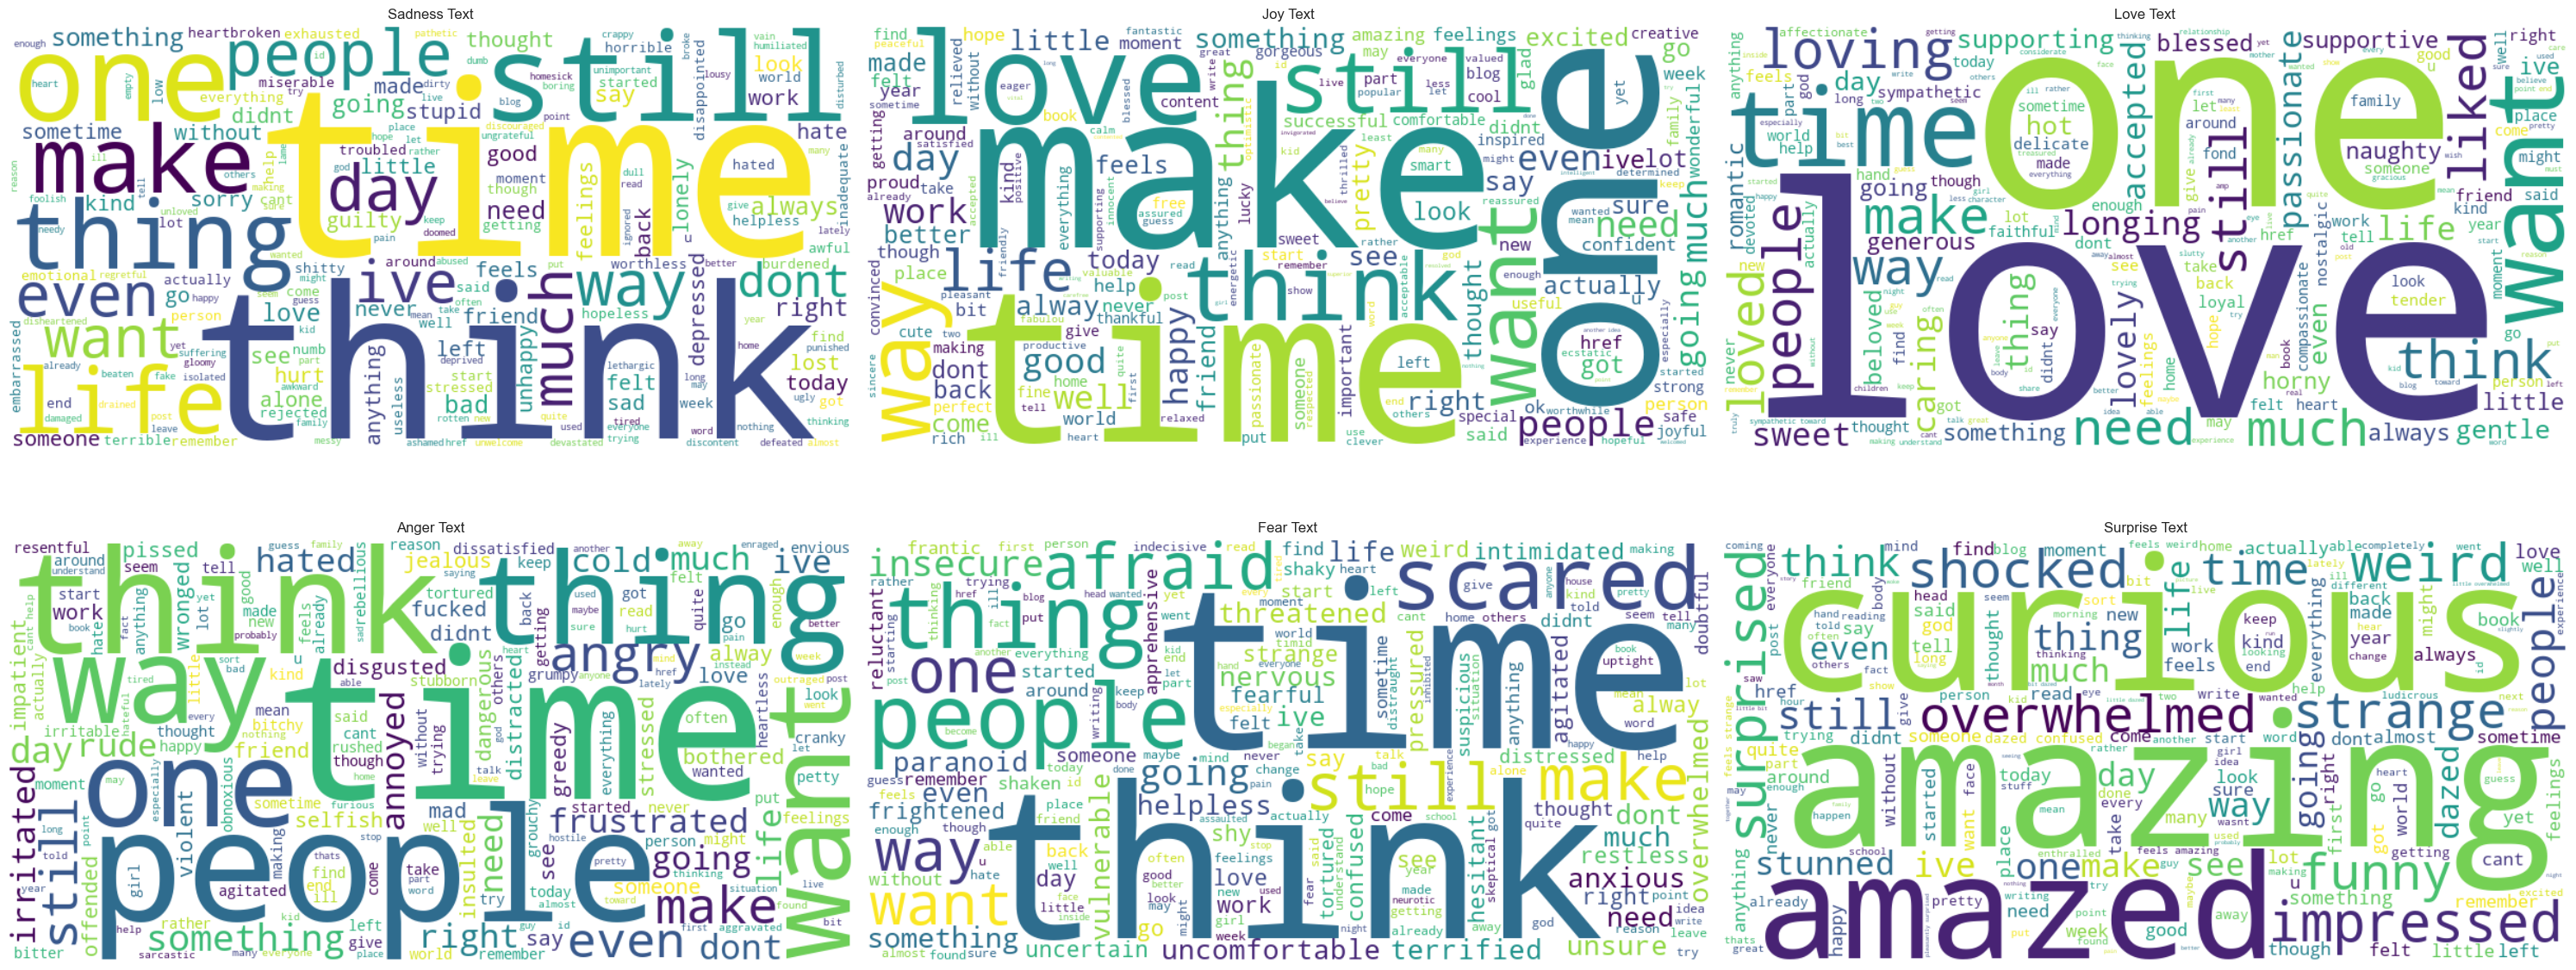

In [58]:
# Plot the word clouds
plt.figure(figsize=(30, 13))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

## Sređivanje podataka

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (uncomment the following line if not already downloaded)?
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/patricijamarijanovic/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patricijamarijanovic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1) Brisanje URL-ova

In [7]:
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)
print(df.head())

                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


2) Uklanjanje suvišnih razmaka

In [8]:
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
print(df.head())

                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


3) Uklanjanje brojeva

In [9]:
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)
print(df.head())

                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


4) U mala slova

In [10]:
df['text'] = df['text'].str.lower()
print(df.head())

                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


5) Micanje stopwords (a, the, is, ...)

In [11]:
stop = stopwords.words('english')
print(stop)
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop]
    return ' '.join(filtered_words)

df["text"] = df["text"].apply(remove_stopwords)
df.head()

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

,text,label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


## Train Test Split

In [12]:
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (333447,)
X_test shape: (83362,)
y_train shape: (333447,)
y_test shape: (83362,)


## Tokenizacija

- koristi se Keras Tokenizer
- svaka jedinstvena riječ predstavljena brojem
- tekst = niz riječi -> niz brojeva

In [13]:
tokenizer = Tokenizer(num_words=50000) # ograničenje na 50 000 najčešćih riječi

#stvaranje rječnika s riječima i njihovim vrijednostima
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

# pretvorba teksta u niz brojeva (pomoću rječnika)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding


In [14]:
maxlen = max(len(niz) for niz in X_train_sequences)
print(maxlen)

79


In [15]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

print(X_train_padded.shape)
print(X_train_padded[0])

(333447, 79)
[   16 30399    69   483     4   183    16     2    34   480 10963   991
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


# Input


In [16]:
# veličina vokabulara = 50 000 jedinstvenih riječi (prethodno ograničili)
input_size = np.max(X_train_padded) + 1
input_size

np.int32(50000)

# Model

- Bidirectional GRU - posebna vrsta RNN
- procesiraju ulazne sekvence u oba smjera istovremeno -> informacije iz prošlog i budućeg konteksta

In [17]:
model = Sequential()

# svaka riječ bit će predstavljena kao vektor od 50 brojeva
model.add(Embedding(50000, 50))

# 0.5 označava postotak jedinica (neurona) koje će biti slučajno isključene tijekom treniranja
# za smanjenje overfittinga
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

# normalizira aktivacije
model.add(BatchNormalization())

model.add(Bidirectional(GRU(64)))

# output layer
model.add(Dense(6, activation='softmax'))

# compiling
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))  # Broj uzoraka može biti bilo koji, zato koristimo None

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 79, 50)         │     2,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 79, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 79, 240)        │       123,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 79, 128)        │       117,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 79, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817,126 (10.75 MB)

 Trainable params: 2,816,870 (10.75 MB)

 Non-trainable params: 256 (1.00 KB)

# Training


In [18]:
history = model.fit(X_train_padded, y_train, epochs = 5, batch_size = 1500, validation_data = (X_test_padded, y_test))

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 576s 3s/step - accuracy: 0.6450 - loss: 0.9314 - val_accuracy: 0.8794 - val_loss: 0.6599
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 570s 3s/step - accuracy: 0.9336 - loss: 0.1293 - val_accuracy: 0.9301 - val_loss: 0.1323
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 672s 3s/step - accuracy: 0.9411 - loss: 0.1009 - val_accuracy: 0.9356 - val_loss: 0.0968
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 597s 3s/step - accuracy: 0.9427 - loss: 0.0928 - val_accuracy: 0.9350 - val_loss: 0.0936
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 649s 3s/step - accuracy: 0.9443 - loss: 0.0879 - val_accuracy: 0.9332 - val_loss: 0.0952


# Evaluation

In [19]:
model.evaluate(X_test_padded, y_test)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 99s 38ms/step - accuracy: 0.9331 - loss: 0.0950


[0.0951821431517601, 0.933230996131897]

# Prediction


In [21]:
input_text = "i cannot believe she forgot my birthday, that's really rude of her"

# Uklanjanje URL-ova
input_text = re.sub(r'http\S+', '', input_text)

# Uklanjanje višestrukih razmaka
input_text = re.sub(r'\s+', ' ', input_text)

# Pretvaranje u mala slova
input_text = input_text.lower()

# uklanjanje stop riječi
words = input_text.split()
filtered_words = [word for word in words if word not in stop]

input_sequence = tokenizer.texts_to_sequences([input_text])

input_padded = pad_sequences(input_sequence, maxlen=maxlen, padding='post')

predicted_probs = model.predict(input_padded)
print(predicted_probs)

emocija_index = predicted_probs.argmax()

lista_emocija = ["sadness", "joy", "love", "anger", "fear", "surprise"]
print("predicted emotion: ", lista_emocija[emocija_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
[[8.9650368e-03 6.6247140e-03 1.0499453e-04 9.8288906e-01 1.3424880e-03
  7.3710384e-05]]
predicted emotion:  anger


# Spremanje modela

In [27]:
model.save("moj_model.keras")

# Spremanje tokenizera

In [28]:
# Pretvori Tokenizer u JSON string
tokenizer_json = tokenizer.to_json()

# Spremi ga u datoteku
with open("tokenizer.json", "w", encoding='utf-8') as f:
    f.write(tokenizer_json)